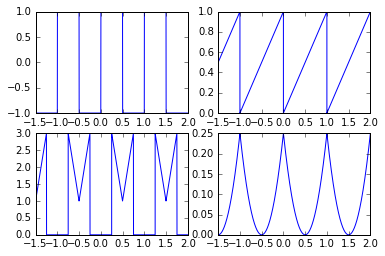

In [92]:
# From https://dspillustrations.com/pages/posts/misc/fourier-series-and-harmonic-approximation.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Fs = 10000 #used later to set up the values in the x-coord of the functions 1,2,3,4 below:
func1 = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float) #step function
func2 = lambda t: t % 1 #saw function
func3 = lambda t: (abs((t%1)-0.5) < 0.25).astype(float) + 8*(abs((t%1)-0.5)) * (abs((t%1)-0.5)<0.25) #MMMM function
func4 = lambda t: ((t%1)-0.5)**2 #parabolas
t = np.arange(-1.5, 2, 1/Fs) #sets x-coord ranging from -1.5 to 2 at intervals of 1/10000.
plt.figure()
plt.subplot(221); plt.plot(t, func1(t))
plt.subplot(222); plt.plot(t, func2(t))
plt.subplot(223); plt.plot(t, func3(t))
plt.subplot(224); plt.plot(t, func4(t))
plt.show();

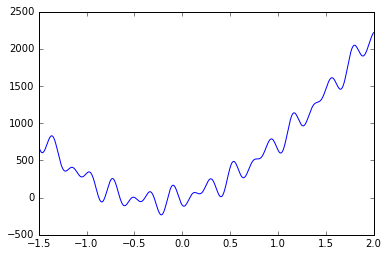

In [117]:
func_test = lambda t: 500 * t**2 - 50 * t**3 - 0.25 * t**4 - 100 * np.sin(20*t) - 100 * np.cos(30*t) + 300 * t
plt.figure()
plt.plot(t,func_test(t))
plt.show();

In [94]:
def fourierSeries(period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

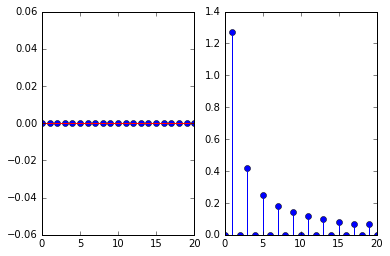

In [95]:
t_period = np.arange(0, 1, 1/Fs)
F = np.round(fourierSeries(func1(t_period), 20),2)
plt.subplot(121); plt.stem(F[:,0])
plt.subplot(122); plt.stem(F[:,1])
plt.show();

[ 0.  1.  1. ..., -1. -1. -1.]
[ 1.          0.9999998   0.99999921 ...,  0.99999822  0.99999921
  0.9999998 ]
[ 0.          0.9999998   0.99999921 ..., -0.99999822 -0.99999921
 -0.9999998 ]
6.8212102633e-13


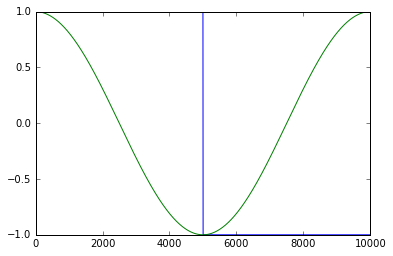

In [96]:
t_period = np.arange(0, 1, 1/Fs)
period = func1(t_period)
print(period)
plt.plot(period)
T = len(period)
t = np.arange(T)
N =20
n = 1
print(np.cos(2*np.pi*n*t/T))
plt.plot(np.cos(2*np.pi*n*t/T))
print(period * np.cos(2*np.pi*n*t/T))
print((period * np.cos(2*np.pi*n*t/T)).sum())
plt.show();

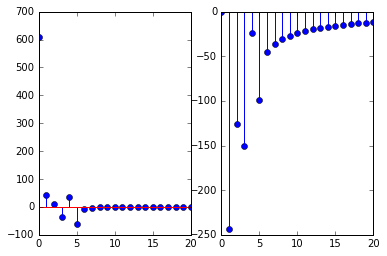

In [118]:
t_period = np.arange(0, 1, 1/Fs)
F = np.round(fourierSeries(func_test(t_period), 20),2)
plt.subplot(121); plt.stem(F[:,0])
plt.subplot(122); plt.stem(F[:,1])
plt.show();

In [119]:
def reconstruct(P, anbn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

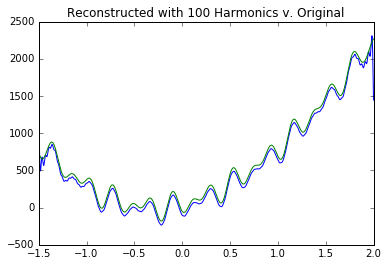

In [121]:
t = np.arange(-1.5, 2, 1/Fs)
F = fourierSeries(func_test(t), 100)

plt.plot(t, reconstruct(len(t), F[:100,:]));
plt.plot(t, func_test(t) + 50)
plt.title('Reconstructed with 100 Harmonics v. Original')
plt.show();

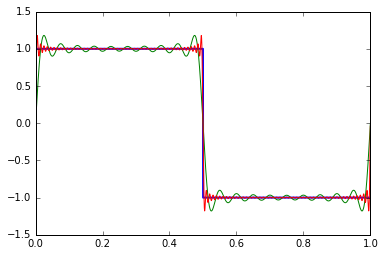

In [100]:
F = fourierSeries(func1(t_period), 100)
plt.plot(t_period, func1(t_period), label='Original', lw=2)
plt.plot(t_period, reconstruct(len(t_period), F[:20,:]), label='Reconstructed with 20 Harmonics');
plt.plot(t_period, reconstruct(len(t_period), F[:100,:]), label='Reconstructed with 100 Harmonics');
plt.show();